# 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

<br>

# 1. 피처들의 의미

**Passengerid**
- 탑승자 데이터 일련번호

**survived**
- 생존 여부
- 0 : 사망
- 1 : 생존

**pclass**
- 티켓의 선실 등급
- 1 : 일등석
- 2 : 이등석
- 3 : 삼등석

**sex**
- 탑승자 성별

**name**
- 탑승자 이름

**Age**
- 탑승자 나이

**sibsp**
- 같이 탑승한 형제자매 또는 배우자 인원수

**parch**
- 같이 탑승한 부모님 또는 어린이 인원수

**ticket**
- 티켓 번호

**fare**
- 요금

**cabin**
- 선실 번호

**embarked**
- 중간 정착 항구
- C : Cherbourg
- Q : Queenstwon
- S : Southampton

<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<br>

`DataFrame.info()`

데이터 컬럼 타입 확인

In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


<br>

`Series.fillna()`

결측값 처리

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


<br>

`Series.value_counts()`

피처별 값 분포 확인

In [6]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
D                3
F33              3
C22 C26          3
E101             3
B18              2
D35              2
E24              2
C68              2
B22              2
B77              2
E44              2
D17              2
F G73            2
E25              2
B5               2
B20              2
C93              2
C83              2
E33              2
D36              2
E8               2
B28              2
C126             2
C52              2
C123             2
              ... 
C101             1
B79              1
B41              1
D11              1
B4               1
E58              1
D6               1
A16              1
B86              1
T                1
D21              1
D46              1
E12              1
C106             1
A31              1
C95              1
E63              1
B30    

<br>

Cabin(선실)의 경우 Null값을 나타내는 N이 가장 많고 속성값도 제대로 정리가 되지 않았다.  
(C23 C25 C27)

Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임

Cabin 속성의 경우 앞 문자만 추출

In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


<br>

# 2. 데이터 탐색

## 2.1 어떤 유형의 승객이 생존 확률이 높았는가?

### 2.1.1 Sex(성별)

성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교

In [8]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

$\rightarrow$ 남자 탑승객 수 : 577명 (468+109)  
$\rightarrow$ 여자 탑승객 수 : 314명 (81+233)  
$\Rightarrow$ 남자가 여자보다 많음

$\rightarrow$ 여자는 312명 중 233명만 살아남아 약 74.2%가 생존  
$\rightarrow$ 남자는 577명 중 109명만 살아남아 약 18.8%가 생존

<br>

`sns.barplot()`

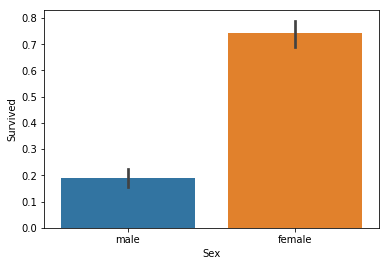

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<br>

### 2.1.2 Pclass(선실 등급)

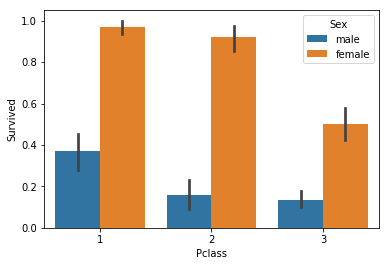

In [10]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성의 경우 삼등실의 경우 생존 확률이 상대적으로 많이 떨어진다.  
남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.

<br>

### 2.1.3 Age(나이)

Age의 경우 값의 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당

In [11]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age) :
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

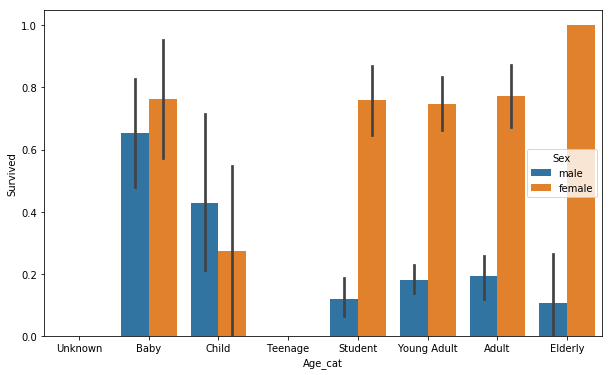

In [12]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenage', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

titanic_df.drop('Age_cat', axis=1, inplace=True)

$\rightarrow$ Baby의 경우 비교적 생존 확률이 높음  
$\rightarrow$ 여자 Child의 경우는 다른 연령대에 비해 생존 확률이 낮음  

<br>

# 3. 인코딩

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환  
인코딩은 사이킷런의 `LabelEncoder` 클래스를 이용  
사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 `fit()`, `transform()`으로 데이터를 변환  

여러 컬럼을 `encode_features()` 함수를 새로 생성해 한 번에 변환

In [13]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [14]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


$\rightarrow$ Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것 확인

<br>

# 4. 피처 가공 내역 정리

피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만듬

`transform_features()`

데이터의 전처리를 전체적으로 호출하는 함수  
Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성

In [15]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [16]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

In [17]:
# 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

In [18]:
# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

<br>

# 5. 원본 데이터 가공

In [19]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('./data/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

<br>

# 6. 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

<br>

# 7. 모델링

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8324
LogisticRegression 정확도 : 0.8659


$\rightarrow$ 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타냄

<br>

# 8. 교차검증

교차 검증으로 결정 트리 모델을 평가  
사이킷런 `model_selection` 패키지의 `KFold` 클래스, `cross_val_score()`, `GridSearchCV()` 클래스 모두 사용  
폴드 개수는 5개로 설정

## 8.1 `KFold`

In [27]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5) :
    # 폴드 세트가 5개인 KFold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

In [28]:
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


$\rightarrow$ 평균 정확도는 약 78.23% 이다.

<br>

## 8.2 `cross_val_score()`

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7765
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8418
평균 정확도 : 0.7835


$\rightarrow$ 평균 정확도는 약 78.35% 이다.

`KFold`와 `cross_val_score()` 의 평균 정확도가 약간 다른 이유는 `cross_val_score()`가 `StratifiedKFold`를 이용해 폴드 세트를 분할하기 때문이다.

<br>

## 8.3 `GridSearchCV`

`DecisionTreeClassifier`의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정  
CV는 5개 폴드 세트 지정  
하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


$\rightarrow$ 예측 정확도가 87.15%로 향상됨